<h2>Data</h2>

The dataset used for the project is extracted from official data from local authority that records information of every incident that happened in Seattle, Washington between year 2004 and 2020. Information regarding the location, place, time, and even conditions under which the incident occurred is presented. Given the project’s objective being to predict the severity of incidents and their cause, the following features are chosen to be studied:

Dependent variable: \
<strong>SEVERITYCODE</strong> - A code that corresponds to the severity of the collision

Independent variables: \
<strong>INATTENTIONIND</strong> - Whether or not the collision was due to inattention; \
<strong>UNDERINFL</strong> - Whether or not a driver involved was under the influence of drugs or alcohol; \
<strong>SPEEDING</strong> - Whether or not speeding was a factor in the collision (Y/N); \
<strong>WEATHER</strong> - A description of the weather conditions during the time of the collision; \
<strong>ROADCOND</strong> - The condition of the road during the collision; and \
<strong>LIGHTCOND</strong> - The light conditions during the collision. \


In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.2


In [13]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [14]:
df_collisions = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
print('Dataset downloaded and read into a pandas dataframe!')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset downloaded and read into a pandas dataframe!


In [15]:
df_collisions.shape

(194673, 38)

In [16]:
missing_data = df_collisions.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

With a total of 194,673 entries and 38 attributes, some 5,000 rows are found with null entries for independent variabes such as ROADCOND and LIGHTCOND, where these rows are expected to be excluded for future modelling purposes.

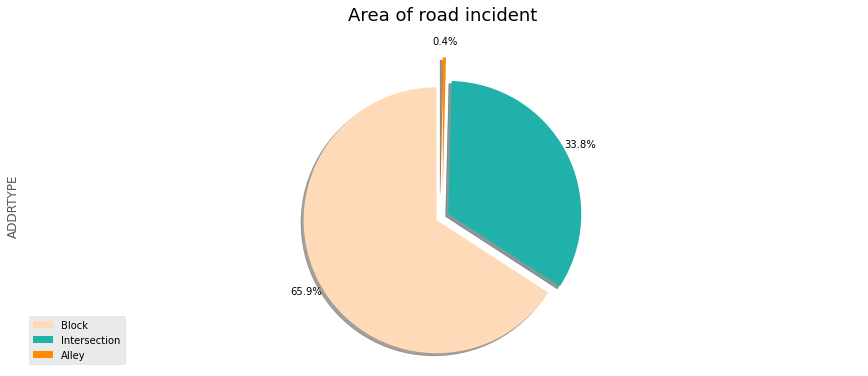

In [17]:
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=df_collisions['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of road incident', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

Another discovery whilst looking into the day is that most (i.e. 66%) of the incidents occyr within blocks rather than intersections. However, we will not be looking into the matter as it is believed to be of minimal importance towards predicting the road condition.

In [21]:
df_severitycount = df_collisions["SEVERITYCODE"].value_counts()
df_severitycount

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

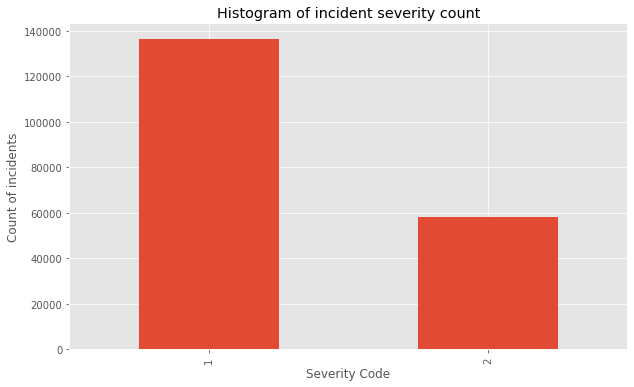

In [22]:
df_severitycount.plot(kind='bar', figsize=(10, 6))

plt.title('Histogram of incident severity count') # add a title to the histogram
plt.ylabel('Count of incidents') # add y-label
plt.xlabel('Severity Code') # add x-label

plt.show()

With the severity code ranging frm 0 to 3(i.e. 0, 1, 2, 2b, 3), incidents within the datasets only covers those with code 1 (property damange) and 2 (injury) only. Whilst the above bar chart depicts an unbalanced dataset, efforts will be made to balance out the count in order to facilitate a more accurate machine learning algorithm.

The following algorithms will be used: \
<strong>Logistic Regression</strong> - Using logistic functions to model binary output (dependent variabe); \
<strong>Decision Tree</strong> - Breaking down the prediction into smaller subsets and generating a tree-like lgoic flow to model the prediciton; \
<strong>k-Nearest Neighbour</strong> - Grouping data points into categories/ groups based on smiliarity measures( or distance in between)